# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [743]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [744]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [745]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 21525 entries, 0 to 21524

Data columns (total 12 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   children          21525 non-null  int64  

 1   days_employed     19351 non-null  float64

 2   dob_years         21525 non-null  int64  

 3   education         21525 non-null  object 

 4   education_id      21525 non-null  int64  

 5   family_status     21525 non-null  object 

 6   family_status_id  21525 non-null  int64  

 7   gender            21525 non-null  object 

 8   income_type       21525 non-null  object 

 9   debt              21525 non-null  int64  

 10  total_income      19351 non-null  float64

 11  purpose           21525 non-null  object 

dtypes: float64(2), int64(5), object(5)

memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [746]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [747]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [748]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [749]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [750]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [751]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [752]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [753]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [754]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [755]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [756]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [757]:
data.duplicated().sum()

71

In [758]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [759]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [760]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [761]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [762]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [763]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

In [764]:
#Создание среза таблицы с исходными данными, чтобы в ней проводить измерения и проверка входящих в него знаечний
df = data[["children","debt","family_status","total_income_category","purpose_category","total_income"]].copy(deep=True)
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 21331 entries, 0 to 21524

Data columns (total 6 columns):

 #   Column                 Non-Null Count  Dtype 

---  ------                 --------------  ----- 

 0   children               21331 non-null  int64 

 1   debt                   21331 non-null  int64 

 2   family_status          21331 non-null  object

 3   total_income_category  21331 non-null  object

 4   purpose_category       21331 non-null  object

 5   total_income           21331 non-null  int64 

dtypes: int64(3), object(3)

memory usage: 1.1+ MB


children                 0
debt                     0
family_status            0
total_income_category    0
purpose_category         0
total_income             0
dtype: int64

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [765]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

#Здесь и далее переименование колонки по которой идет сортировка для более наглядного вывода
#окончательного варианта таблицы
df.rename(columns = {'children':'Количество детей'}, inplace = True )

grouped_by_children = df.groupby("Количество детей")["debt"].agg(["count","sum"])

grouped_by_children["debtors_percent"] = (grouped_by_children["sum"]/grouped_by_children["count"]*100).round(2)

grouped_by_children.columns = ["Общее количество выданных кредитов","Количество должников","Процент должников"]

multi_child_total = grouped_by_children.loc[3:,"Общее количество выданных кредитов"].sum()
multi_child_debtors = grouped_by_children.loc[3:,"Количество должников"].sum()
percentage = (multi_child_debtors/multi_child_total*100).round(2)
print(f"Должников среди многодетных семей: {percentage}%")

grouped_by_children

Должников среди многодетных семей: 8.16%


,Общее количество выданных кредитов,Количество должников,Процент должников
Количество детей,,,
0,14091,1063,7.54
1,4808,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76
5,9,0,0.00


**Вывод:** 
У семей с разным количством детей процент невозврата кредита в срок различается. Меньше всего просроек у бездетных, тогда как больше всего у семей с 4 детьми. Однако для многодетных семей такой результат может быть ненадежным, так как получен по малой выборке. 
Был расчитан общий процент должников для многодетных семей, который составил менее 9%. Если принять во внимание этот результат, то самым неблагонадежным платильщиком можно назвать семью с двумя детьми.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [766]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

df["family_status"] = df["family_status"].str.lower()

df.rename(columns = {'family_status':'Семейное положение'}, inplace = True )

grouped_by_family_status = df.groupby("Семейное положение")["debt"].agg(["count","sum"])

grouped_by_family_status["debtors_percent"] = (grouped_by_family_status["sum"]/grouped_by_family_status["count"]*100).round(2)

grouped_by_family_status.columns = ["Общее количество выданных кредитов","Количество должников","Процент должников"]

grouped_by_family_status

,Общее количество выданных кредитов,Количество должников,Процент должников
Семейное положение,,,
в разводе,1189,84,7.06
вдовец / вдова,951,63,6.62
гражданский брак,4134,385,9.31
женат / замужем,12261,927,7.56
не женат / не замужем,2796,273,9.76


**Вывод:** 
Меньше всего просрочек по кредиту у вдовцов и вдов (всего 6,62% от общего количтсва), однако они представляют собой наименьшую по количеству категорию заемщиков. Менее отвественны в выплате кредитов в срок одиокие люди. Категория состоящих в браке наибольшая, так что результат, полученный для них, можно считать наиболее надежным.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,"Доход, руб",Общее количество выданных кредитов,Количество должников,Процент должников
A,Более 1000000,25,2,8.00
B,200001-1000000,5014,354,7.06
C,50001-200000,15921,1353,8.50
D,30000-50000,349,21,6.02
E,Менее 30000,22,2,9.09


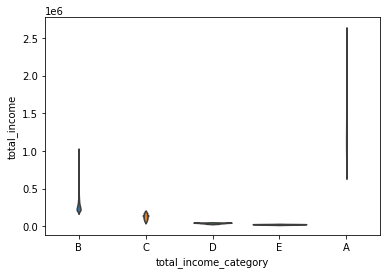

In [767]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

#Исследвание разбраса значений внутри различных категорий дохода
import seaborn as sns
sns.violinplot(data=df,x="total_income_category",y="total_income",inner=None)

#Создание понятного описания категорий
income_categories = pd.DataFrame({"Доход, руб":["Более 1000000","200001-1000000","50001-200000","30000-50000","Менее 30000"]},index=["A","B","C","D","E"]) 

grouped_by_income = df.groupby("total_income_category")["debt"].agg(["count","sum"])

grouped_by_income["debtors_percent"] = (grouped_by_income["sum"]/grouped_by_income["count"]*100).round(2)

grouped_by_income.columns = ["Общее количество выданных кредитов","Количество должников","Процент должников"]

income_categories.merge(grouped_by_income, left_index=True, right_index=True)

**Вывод:** 
На графике можно видеть разброс доходов в отдельных категориях.

Наиболее надежным можно считать результаты, полученные для заемщиков с доходом от 50'000 до 1'000'000 руб. В категории "С" находится больше человек, чем в сумме по всем остальным, так что можно предположить, что полученные 8,50% являются корректной оценкой. В тоже время в категориях "В" и "А" набдюдается большой разброс в доходах, и возможно, если разделить категорию "В" на подгатегории, это изменит результат, в то время разделение категории "А" не даст положительного реузльтата, так как заемкщиков внутри этой категории и так мало. Как и в "А" в категории "Е" малое количество заемщиков, что делает оценку ненадежной.

В целом нельзя сказать, что уроевнь дохода и процент должников имеюют линейную зависимость. Более показательные результаты могло бы дать деление на более мелкие категории для проверки данной гипотезы.


P.S.
С другой стороны, деление на данные категории именно по таким уровням было скорее всего было обосновано, даже несмотря на большой разброс значений доходов внутри них.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [768]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
df.rename(columns = {'purpose_category':'Цель кредита'}, inplace = True )

grouped_by_purpose = df.groupby("Цель кредита")["debt"].agg(["count","sum"])

grouped_by_purpose["debtors_percent"] = (grouped_by_purpose["sum"]/grouped_by_purpose["count"]*100).round(2)

grouped_by_purpose.columns = ["Общее количество выданных кредитов","Количество должников","Процент должников"]

grouped_by_purpose

,Общее количество выданных кредитов,Количество должников,Процент должников
Цель кредита,,,
операции с автомобилем,4279,400,9.35
операции с недвижимостью,10751,780,7.26
получение образования,3988,369,9.25
проведение свадьбы,2313,183,7.91


**Вывод:** 
Во всех категориях количество заемщиков достаточно, чтобы предположить, что оценка являтеся надежной.

Меньше просрочек по кредиту наблюдаются в категории "Операции с недвижимостью" (7.26%). Это можно объяснить тем, что чаще такие кредиты берутся под залог покупаемой недвижимости. Тогда как в категориях "Операции с автомобилем" и "Получение образования" наблюдается примерно одинаковое количество просроченных платежей.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Человеский фактор при заполнении данных или выгрузке, ошибки программного обеспечения при загрузке и выгрузке, отсутсвие данных по некоторым категориям в принципе

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Аномально большие или малые значения могут исказить конечный результат, если брать среднее занчение ряда, поэтому применяют медиану

### Шаг 4: общий вывод.

В работе был расчитан общий процент должников по разным категориям заемщиков. Полученные значения позволяют оценить есть ли аномальные значения количества просрочек в зависимость от категории.
Как уже говорилось выше, для категорий с малым количеством заемщиков полученный результат не является надежным.
Также можно рассмотреть не только простой результат в виде получени процента просроченных платежей, но и найти коэффиценты корреляции между различными видами переменных.
При нахождении корреляции влиния дохода на выплаты в срок реузьтаты расчетов могли быть искажены тем, что некоторые данные были получены путем отыскания медианного значения. 